In [1]:
# imporing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# load the datasets
iris = datasets.load_iris()

In [3]:
# onluy select the first two classes(binary classificatin) and two features for simplicity
x = iris.data[iris.target != 2, :2]

# select first two features (sepal legnth and sepal width)
y = iris.target[iris.target != 2]

In [4]:
# split the datasets into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
# standardize the features (SVM workds better tith standaridzed features)
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
# Train the Support Vector Classifer(SVC) with a liner kernel
svm_model = SVC(kernel='linear')

svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [8]:
# Make Prediction
y_pred = svm_model.predict(x_test)

In [9]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)

In [10]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.40
Confusion Matrix:
[[ 0 12]
 [ 0  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.40      1.00      0.57         8

    accuracy                           0.40        20
   macro avg       0.20      0.50      0.29        20
weighted avg       0.16      0.40      0.23        20



c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    # Create a grid of points
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict classes for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training points
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM Decision Boundary')
    plt.show()

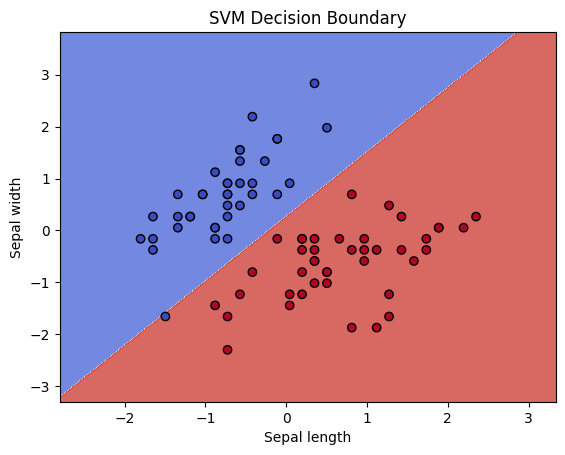

In [12]:
# Plotting the decision boundary for the SVM model
plot_decision_boundary(x_train, y_train, svm_model)